In [210]:
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [211]:
figsave_dir = '..\\out\\'

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Random dataset

In [103]:
sizes = [1, 2, 4, 5, 6]
n = [10000, 2000, 800, 400, 200]
colors = ['#2d6662', '#59178a', '#112438', '#2d6662', '#1855a9']

In [104]:
# Sky:
#040c15

# Stars:
#1855a9
#123c62
#2d6662
#112438
#59178a

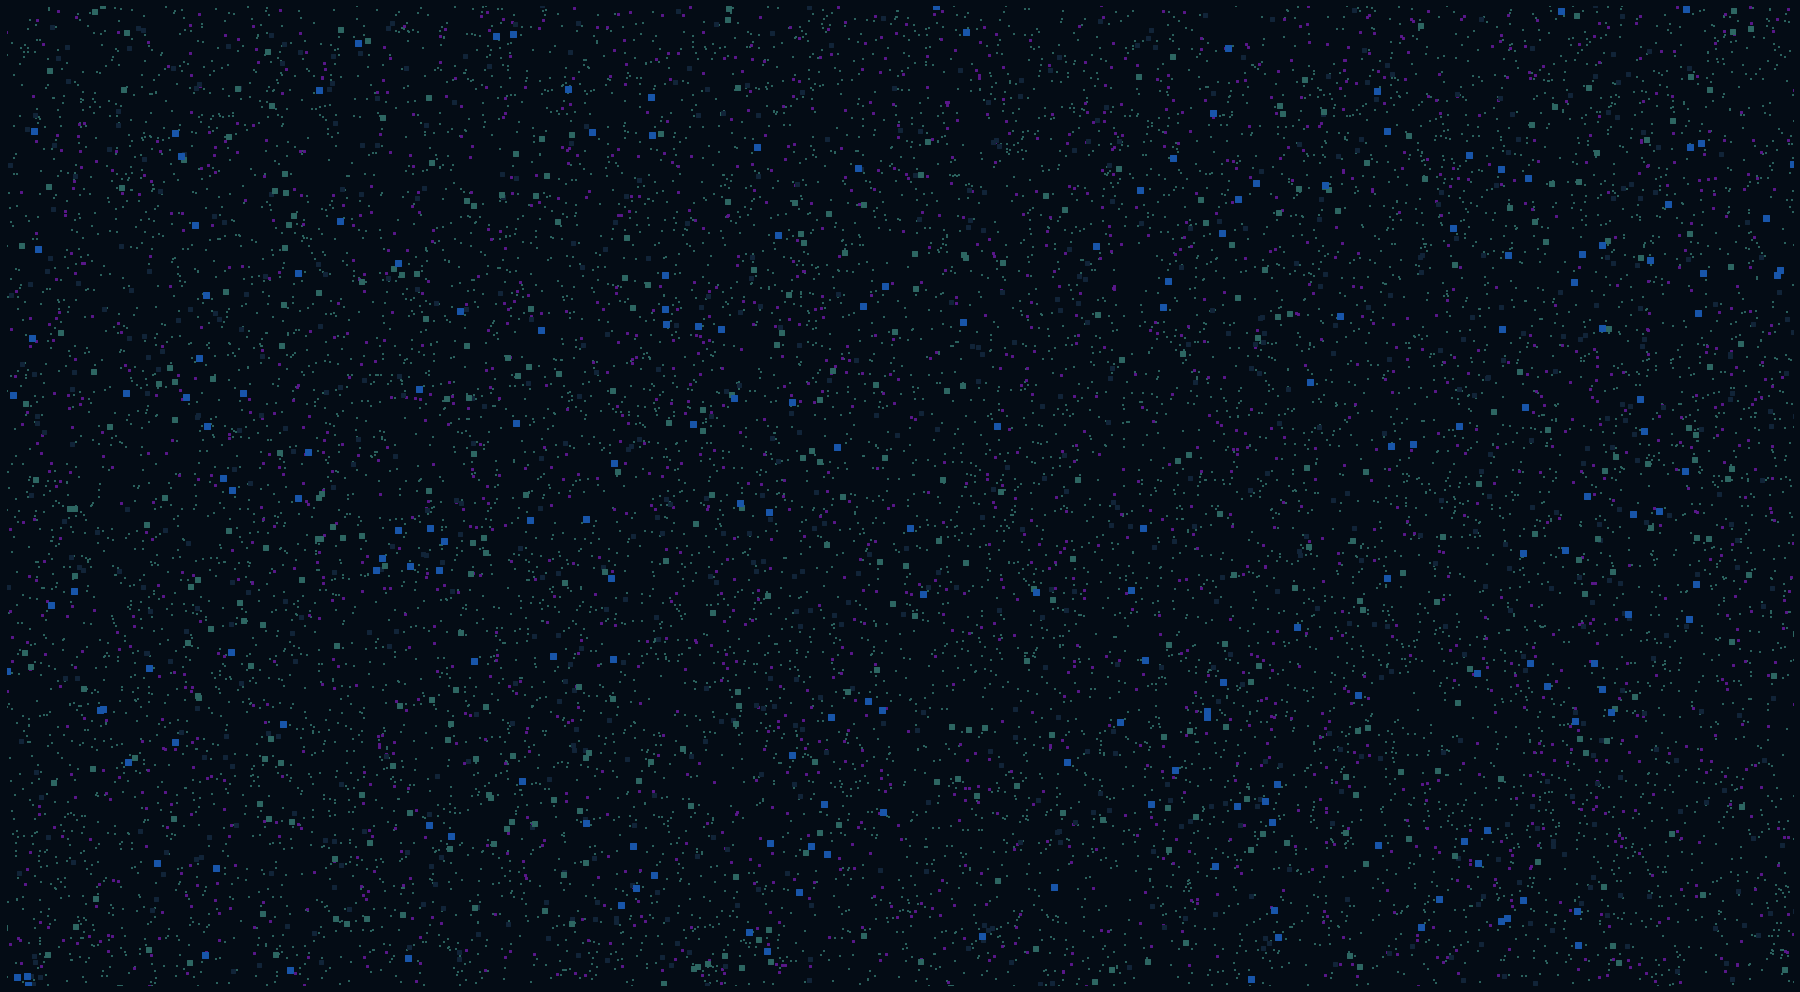

In [107]:
save = True

scale = 2
fig, axes = plt.subplots(figsize=(16*scale,9*scale), facecolor='#040c15',
                         subplot_kw=dict(facecolor='#040c15'))

axes.set_aspect('auto')
axes.axis('off')


for i in range(5):
    
    X = np.random.random(n[i])
    Y = np.random.random(n[i])
    
    axes.scatter(X, Y,
                 color=colors[i], marker='s', s=sizes[i]**2)

axes.set_xlim(np.min(X), np.max(X))
axes.set_ylim(np.min(Y), np.max(Y))
    
if save:
    plt.savefig('background.svg',
                format='svg', dpi=200,
                facecolor='black', edgecolor='black',
                pad_inches=0, bbox_inches='tight')

plt.show()

### Hipparcos dataset from VizieR

Source: http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/311/hip2

In [28]:
df = pd.read_table('asu.tsv', sep=';', comment='#', skiprows=[36,37])

In [29]:
df

RArad      DErad
0         0.000912   1.089013
1         0.003797 -19.498837
2         0.005008  38.859286
3         0.008382 -51.893546
4         0.009965 -40.591224
...            ...        ...
117950  206.398693  17.742441
117951  119.382277 -60.630932
117952  119.448662 -60.609727
117953  119.454927 -60.683660
117954  119.512154 -60.614813

[117955 rows x 2 columns]

In [199]:
min_lim = 0
max_lim = 90

sample_df = df[(df.RArad<max_lim) & (df.RArad>min_lim)]
sample_df

RArad      DErad
0        0.000912   1.089013
1        0.003797 -19.498837
2        0.005008  38.859286
3        0.008382 -51.893546
4        0.009965 -40.591224
...           ...        ...
28330   89.992760  41.641545
28331   89.993325  52.343431
117930  77.676793 -20.750833
117931  89.854726  17.816414
117936  49.804725 -73.648386

[28335 rows x 2 columns]

### Choose radiuses accroding to the Boltzmann distribution

In [200]:
def sign_choose():
    return -1 if np.random.random() < 0.5 else 1

In [201]:
def boltzmann(r, r_0, C):
    return r_0 ** np.exp(-C*r) - 1

In [305]:
# Define color lookup table
#'#2d6662', '#995c70', '#112438', '#2d6662', '#1855a9'
color_lut = np.array(['#2d6662', '#995c70', '#2d6662', '#2d6662', '#1855a9'])

# Multiplier for radiuses
resize = 1.2
# Define radius lookup table
radius_lut = np.array([1, 1.5, 3, 5, 7]) * resize

stars = {i+1: [[],[]] for i, _ in enumerate(radius_lut)}

In [306]:
# Create color and radius bins
bins = np.linspace(0, 1, len(radius_lut) + 1)[:-1]

In [307]:
# Random deviation to radiuses
sigma = 0.3

# Points chosen so far
n = 0
while n < len(sample_df):
    
    # Normed size of scatterpoint
    s = np.random.random()
    # Value to compare 
    c = np.random.random()
    if c < boltzmann(s, r_0=2, C=5):
        bin_ = np.digitize(s, bins)
        
        stars[bin_][0].append(n)
        stars[bin_][1].append(radius_lut[bin_-1] + sign_choose() * np.random.random() * sigma)
        n += 1

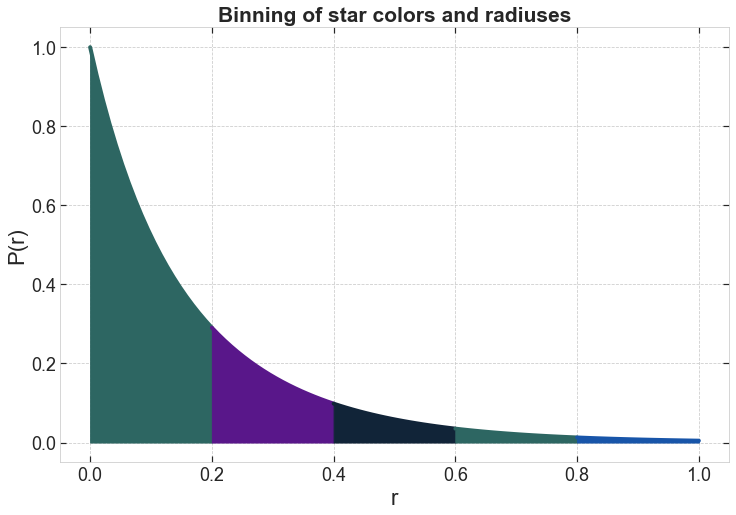

In [308]:
save = False
fig, ax = plt.subplots(figsize=(12,8))

axistitlesize = 21
axislabelsize = 22
axisticksize = 18

for idx, c in enumerate(color_lut):
    X = np.linspace(idx*0.2, (idx+1)*0.2, 20)
    Y = boltzmann(X, r_0=2, C=5)
    ax.plot(X, Y,
            color=color_palette[idx], lw=4)
    ax.fill_between(X, Y, color=color_palette[idx])

ax.set_title('Binning of star colors and radiuses',
             fontsize=axistitlesize, fontweight='bold')
    
ax.set_xlabel('r', fontsize=axislabelsize)
ax.set_ylabel('P(r)', fontsize=axislabelsize)
ax.tick_params(axis='both', which='major', labelsize=axisticksize)

if save:
    fig.savefig(figsave_dir +
                'boltzmann_dist.png')

plt.show()

In [309]:
# Axis limits
x_min = np.min(sample_df.RArad)
x_max = np.max(sample_df.RArad)

y_min = np.min(sample_df.DErad)
y_max = np.max(sample_df.DErad)

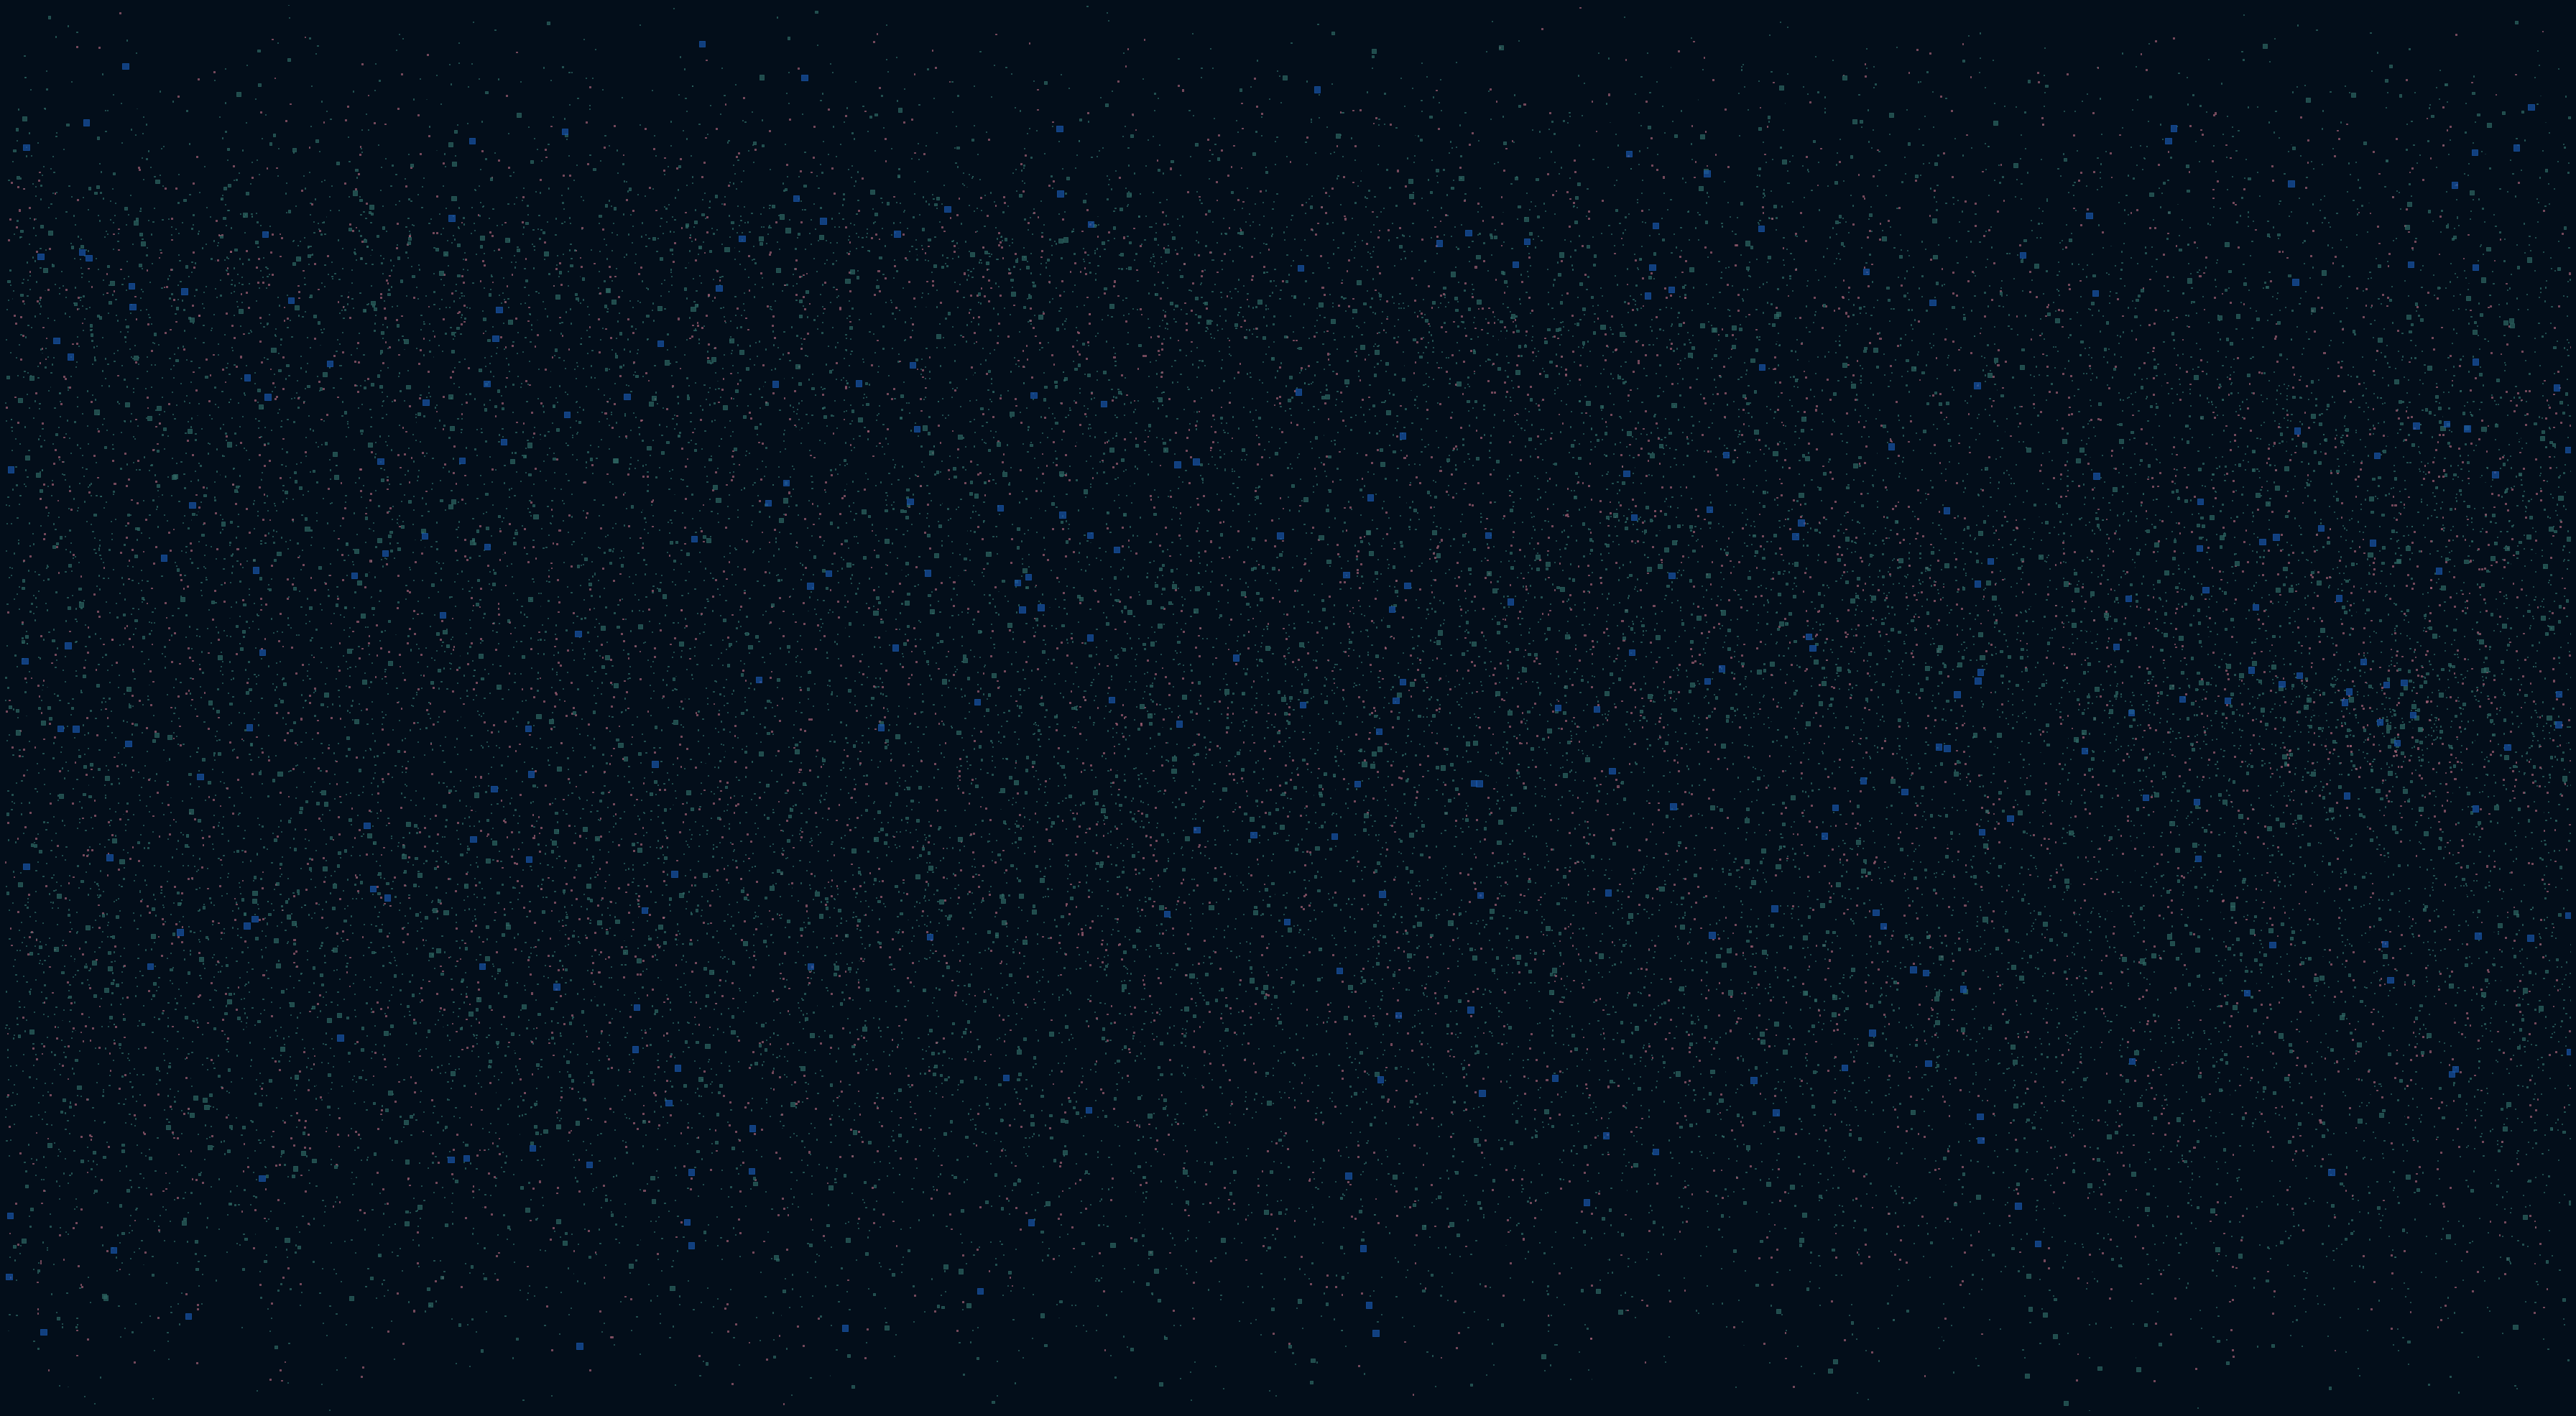

In [310]:
save = True

scale = 4
fig, axes = plt.subplots(figsize=(16*scale,9*scale), facecolor='#030e1a',
                         subplot_kw=dict(facecolor='#030e1a'))

axes.set_aspect('auto')
axes.axis('off')

for key, values in stars.items():
    indeces = values[0]
    radiuses = values[1]
    axes.scatter(sample_df.RArad.iloc[indeces], sample_df.DErad.iloc[indeces],
                 color=color_lut[key-1], marker='s', s=np.array(radiuses)**2,
                 alpha=0.7)

axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)

figsave_format = 'png'
if save:
    plt.savefig('background.{0}'.format(figsave_format),
                format=figsave_format, dpi=200,
                facecolor='#030e1a', edgecolor='#030e1a',
                pad_inches=0, bbox_inches='tight')

plt.show()